华夫饼图Waffle chart是一种独特而直观的图表，用于表示分类数据。它采用网格状排列的等大小方格或矩形，每个方格或矩形分配不同的颜色或阴影来表示不同的类别。这种可视化方法有效地传达了每个类别在整个数据集中的相对比例。本文介绍如何使用基于Python的PyWaffle库绘制华夫饼图。PyWaffle开源仓库地址见：[PyWaffle](https://github.com/gyli/PyWaffle)，PyWaffle官方文档见：[PyWaffle-docs](https://pywaffle.readthedocs.io/en/latest/index.html)。

PyWaffle安装方式如下：


> pip install -U pywaffle

In [33]:
# PyWaffle库依赖于matplotlib绘制图片
import matplotlib.pyplot as plt
from pywaffle import Waffle

# 1 使用简介
## 1.1 基本使用

### 1.1.1 基础绘图

PyWaffle库通过其Waffle类提供了一种便捷的方式来创建华夫饼图。每个类别的方格占比可以通过参数values进行设置，数据可以是列表、字典和Pandas.DataFrame结构。然后可以使用rows和columns参数来定制行数和列数。只需要指定其中一个参数，另一个参数可以根据values的总和推断出来。

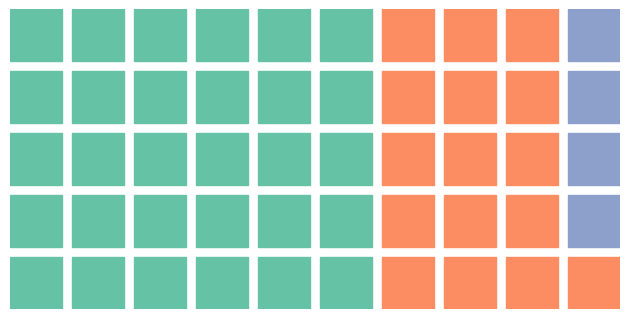

In [34]:
# 新建绘图图像
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    # columns=10,
    values=[30, 16, 4]
)
# 保存结果
# fig.savefig("plot.png", bbox_inches="tight")
plt.show()

如果value参数输入的是比例值，则必须设置rows和columns属性来定义值的显示方式。

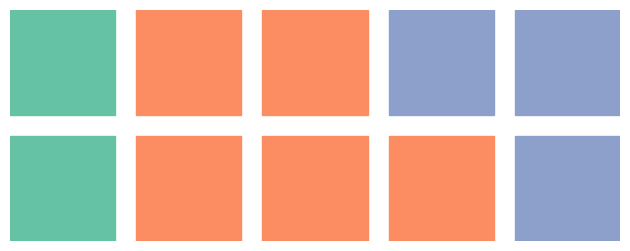

In [35]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=2,
    columns=5,
    values=[0.2, 0.5, 0.3]
)
plt.show()

如果values总和与rows*columns的结果不一致，Waffle类将values解释为各部分的相对比例。

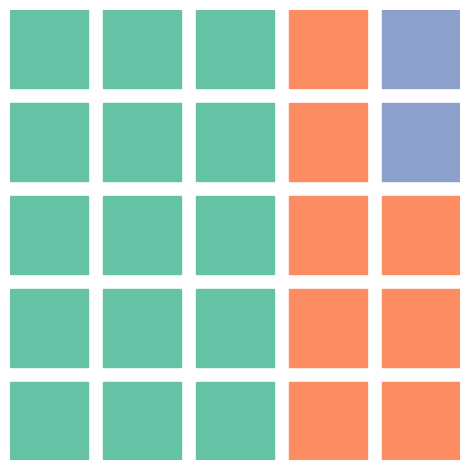

In [36]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=5,
    values=[30, 16, 4]
)
plt.show()

当字典传递给values时，键将用作标签并显示在图例中，注意图例会默认显示。

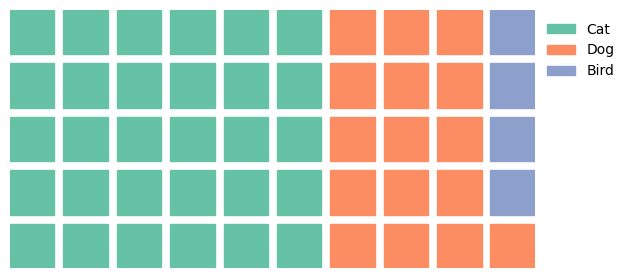

In [37]:
plt.figure(
    FigureClass=Waffle,
    rows=5,
    values={'Cat': 30, 'Dog': 16, 'Bird': 4},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'frameon': False} # 修改图例
)
plt.show()

不显示图例。

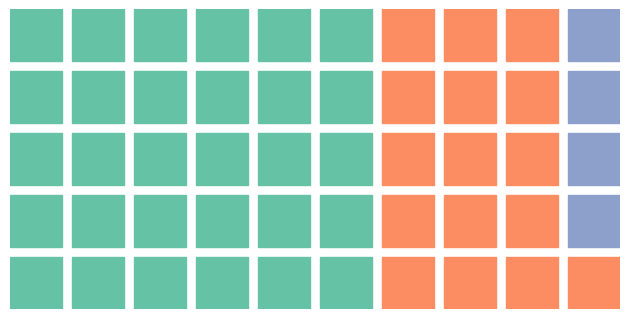

In [38]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values={'Cat': 30, 'Dog': 16, 'Bird': 4},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'frameon': False} # 修改图例
)

# 移除legend
fig.axes[0].get_legend().remove()

plt.show()

### 1.1.2 类别比例设置

如果values的总和与rows*columns的结果不一致，Waffle类将解释values为各部分的相对比例。如下所示各个类别方块数输出为小数，小数位的取舍会导致不同的展示效果：

In [39]:
# nearest, ceil or floor

import numpy as np

target = {'Cat': 48, 'Dog': 46, 'Bird': 3, 'Fish': 9}

values = np.array(list(target.values()))

values_ratio = values /sum(values)
# 华夫饼图结构
row = 2
col = 5
# 各个类别方块数
values_ratio * row *col

array([4.52830189, 4.33962264, 0.28301887, 0.8490566 ])

为此，Waffle类通过rounding_rule参数来处理小数位取舍问题。rounding_rule可选值为nearest(默认), ceil或floor。具体如下：

**nearest**

nearest表示将方块的数值四舍五入到最接近的整数。

In [40]:
# 各个类别方块数
np.round(values_ratio * row *col, 0).astype(int)

array([5, 4, 0, 1])

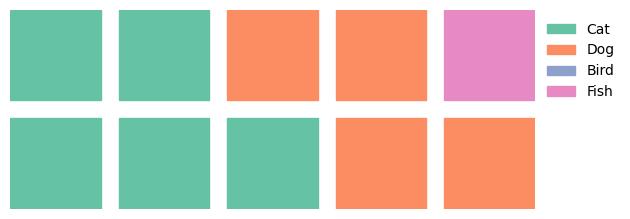

In [41]:
np.round(values_ratio*10,0).astype(int)

plt.figure(
    FigureClass=Waffle,
    rows=2,
    columns=5,
    values=target,
    rounding_rule='nearest', # 默认值
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'frameon': False} # 修改图例
)
plt.show()

**ceil**

ceil表示将方块的数值向上舍入到最接近的整数。然而，在nearest和ceil模式下，方块的总和可能会超过华夫饼图的预设长度，超出预设长度的方块将不会显示。这也意味着，输入类别位置越靠后，其方块显示的数值越可能不准确。

In [42]:
# 各个类别方块数
np.ceil(values_ratio * row *col).astype(int)

array([5, 5, 1, 1])

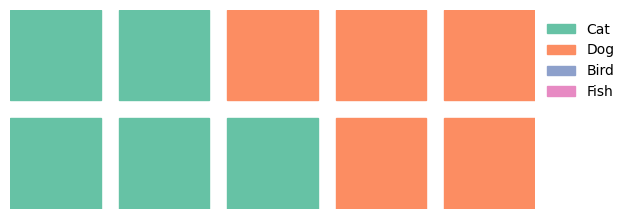

In [43]:
np.round(values_ratio*10,0).astype(int)

plt.figure(
    FigureClass=Waffle,
    rows=2,
    columns=5,
    values=target,
    rounding_rule='ceil', # 默认值
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'frameon': False} # 修改图例
)
plt.show()

**floor**

floor表示将方块的数值向下舍入到最接近的整数，由于这种舍入方式的特性，绘制的方块数可少于预设的数量。

In [44]:
# 各个类别方块数
np.floor(values_ratio * row *col).astype(int)

array([4, 4, 0, 0])

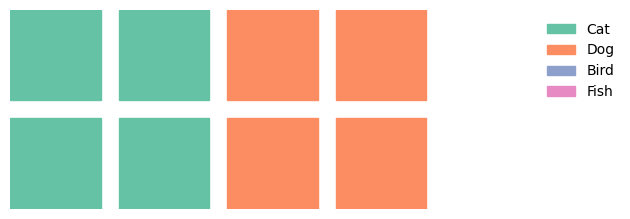

In [45]:
np.round(values_ratio*10,0).astype(int)

plt.figure(
    FigureClass=Waffle,
    rows=2,
    columns=5,
    values=target,
    rounding_rule='floor', # 默认值
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'frameon': False} # 修改图例
)
plt.show()

如果想要在华夫饼图中完整显示所有类别，但又不希望方块数量过多，一种有效的方法是只设定rows或columns中的一个参数，然后将每个类别的数值除以最小类别的数值，以确保最少类别的方块数量为1，同时将其他类别的数值显示为相对于最少类别的比例。

In [46]:
target_ = target.copy()
# 找到最小值
min_value = min(target_.values())

# 更新字典中每个键对应的值
target_ = {key: int(value / min_value) for key, value in target.items()}
print(target_)

{'Cat': 16, 'Dog': 15, 'Bird': 1, 'Fish': 3}


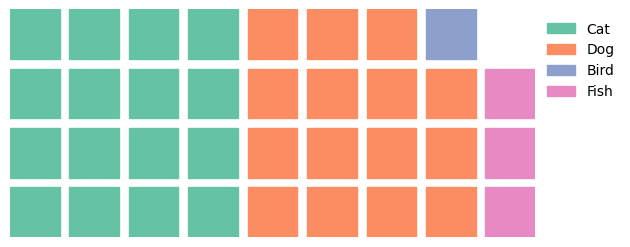

In [47]:
np.round(values_ratio*10,0).astype(int)

plt.figure(
    FigureClass=Waffle,
    rows=4,
    values=target_,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'frameon': False} # 修改图例
)
plt.show()

## 1.2 样式设置

### 1.2.1 展示效果设置

**标题、标签和图例**

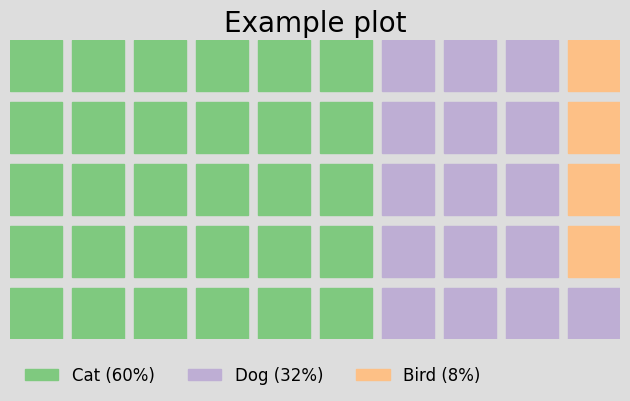

In [48]:
data = {'Cat': 30, 'Dog': 16, 'Bird': 4}
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values = data,
    title={
        'label': 'Example plot',
        'loc': 'center',
        'fontdict': {
            'fontsize': 20
        }
    },
    labels=[f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()],
    legend={
        #'labels': [f"{k} ({v}%)" for k, v in data.items()],  # labels可以在legend中设置
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.2),
        'ncol': len(data),
        'framealpha': 0,
        'fontsize': 12
    },
    # 设置颜色条，支持Pastel1, Pastel2, Paired, Accent, Dark2, Set1, Set2, Set3, tab10, tab20, tab20b, tab20c
    cmap_name="Accent",
    facecolor='#DDDDDD',  # 绘图背景色

    # 也可以单独设置颜色
    # colors=["#232066", "#983D3D", "#DCB732", "F12F34"]

)

**方块宽高比设置**

参数block_aspect_ratio通过更改块的宽度与块的高度之比来控制方块的形状。默认block_aspect_ratio为1，也就是每个方块都是正方形。

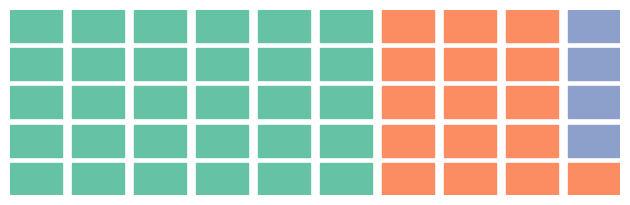

In [49]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[30, 16, 4],
    block_aspect_ratio=1.618
)

**方块间距控制**

参数interval_ratio_x和interval_ratio_y分别负责调节块之间的水平和垂直间距。具体来说，interval_ratio_x代表了块之间的水平间距与块宽度的比率，而interval_ratio_y则反映了块之间的垂直间距与块高度的比率。

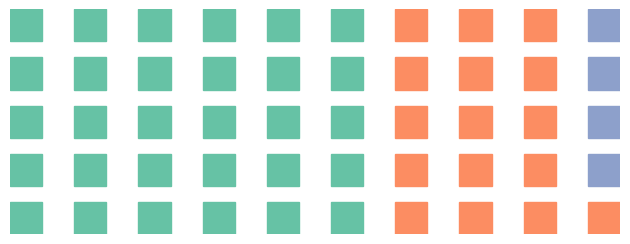

In [50]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[30, 16, 4],
    interval_ratio_x=1,
    interval_ratio_y=0.5
)

**起始方块绘图位置**

starting_location用于设置起始方块的位置。这个参数可输入包括 "NW（西北角、左上角）"、"SW（默认值，西南角，右下角）"、"NE（东北角，右上角）" 和 "SE（东南角，右下角）"。

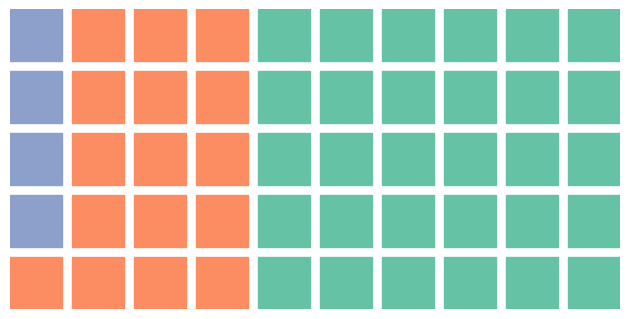

In [51]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[30, 16, 4],
    starting_location='SE'
)

**绘图方向**

默认情况下PyWaffle逐列绘制方块，因此类别是按水平方向排列绘制的，如果按行绘制方块，则设置vertical参数为True。

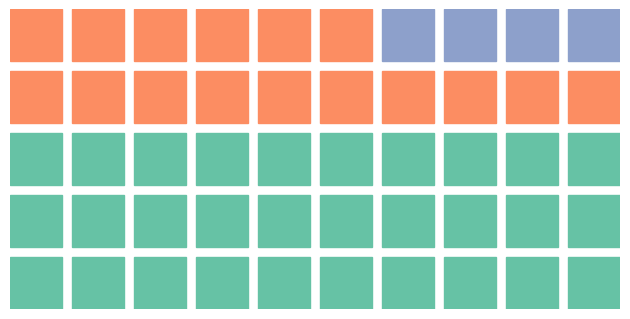

In [52]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[30, 16, 4],
    vertical=True
)

**类别方块排列方式**


block_arranging_style参数用于控图中各类别方块的排列方式，具体如下：

+ normal: 默认方式，方块会按照常规的网格模式进行排列。
+ new-line: 每个类别的方块都会从新的一行开始排列。这意味着，如果你有多个类别，每行只有一个类别的图标。
+ snake: 方块会按照“蛇形”或“之字形”的模式进行排列。

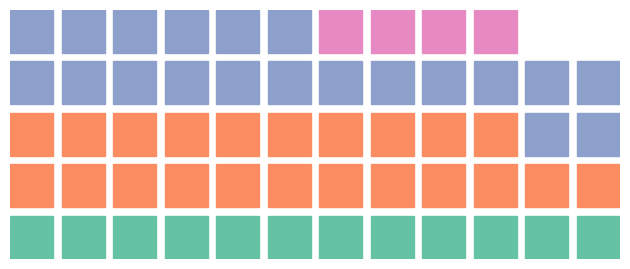

In [53]:
# new-line排列
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[12, 22, 20, 4],
    vertical=True,
    block_arranging_style='new-line'
)

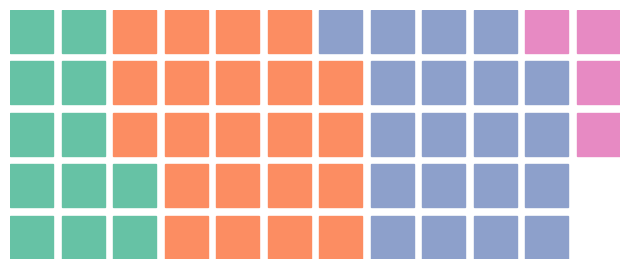

In [54]:
# snake排列
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[12, 22, 20, 4],
    block_arranging_style='snake'
)

### 1.2.2 绘图框架自定义

**子图绘制**

PyWaffle可以通过添加子图的方式，实现在同一张图中显示多个华夫饼图。以下是示例：


In [55]:
import pandas as pd
# 创建一个产量表格
data = pd.DataFrame(
    {
        'labels': ['Car', 'Truck', 'Motorcycle'],
        'Factory A': [44183, 12354, 3246],
        'Factory B': [29198, 7678, 2556],
        'Factory C': [9013, 4079, 996],
    },
).set_index('labels')

Text(0.5, 0.01, '1 block = 1000 vehicles')

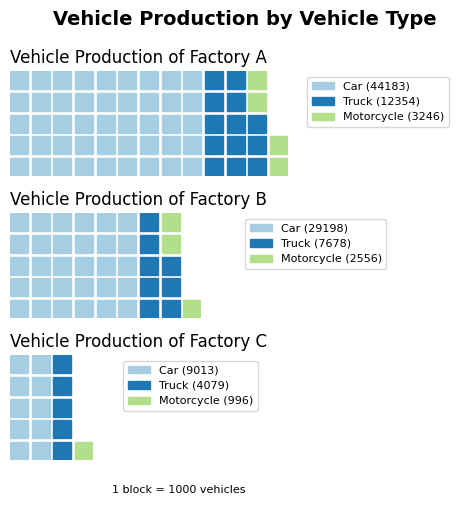

In [56]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: { # 311数字对应于 matplotlib中subplot 的位置编码方式，311表示一个三行一列的布局中的第一个子图
            'values': data['Factory A'] / 1000,   # 将实际数字转换为合理的块数
            'labels': [f"{k} ({v})" for k, v in data['Factory A'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Vehicle Production of Factory A', 'loc': 'left', 'fontsize': 12}
        },
        312: {
            'values': data['Factory B'] / 1000,
            'labels': [f"{k} ({v})" for k, v in data['Factory B'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
            'title': {'label': 'Vehicle Production of Factory B', 'loc': 'left', 'fontsize': 12}
        },
        313: {
            'values': data['Factory C'] / 1000,
            'labels': [f"{k} ({v})" for k, v in data['Factory C'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.3, 1), 'fontsize': 8},
            'title': {'label': 'Vehicle Production of Factory C', 'loc': 'left', 'fontsize': 12}
        },
    },
    rows=5,   # 应用于所有子图的外部参数，与下面相同
    cmap_name="Paired", 
    rounding_rule='ceil', 
    figsize=(5, 5)
)

fig.suptitle('Vehicle Production by Vehicle Type', fontsize=14, fontweight='bold')
# 说明1个方块代表多少车辆
fig.supxlabel('1 block = 1000 vehicles', fontsize=8, ha='right')

**现有轴绘图**

Pywaffle提供Waffle.make_waffle方法来在现有的matplotlib轴上绘图，而不需要重新初始化Waffle实例。

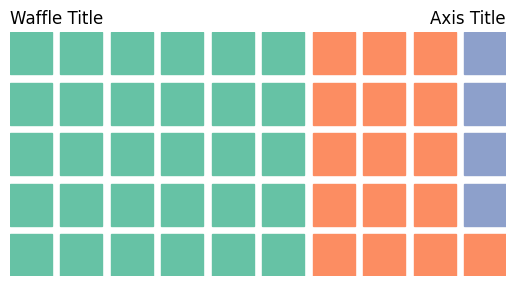

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)


ax.set_title("Axis Title", loc= "right")
ax.set_aspect(aspect="equal")

Waffle.make_waffle(
    ax=ax,  # 利用现有绘图对象
    rows=5, 
    columns=10, 
    values=[30, 16, 4], 
    title={"label": "Waffle Title", "loc": "left"}
)

此外可以利用make_waffle与已定义坐标轴来显示多个数据结果。

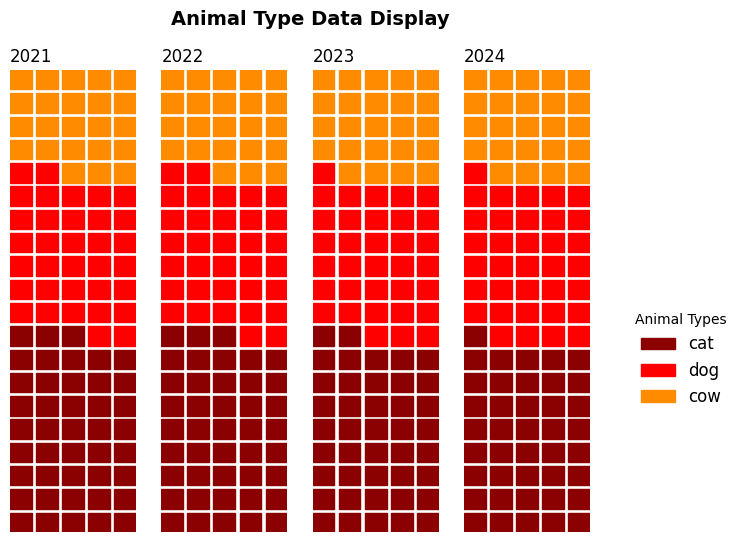

In [58]:
import matplotlib.patches as mpatches 

data = {  
    2021: [175, 139, 96],  
    2022: [232, 187, 126],  
    2023: [345, 278, 195],  
    2024: [456, 389, 267]  
}  
  
df = pd.DataFrame(data,index=['cat', 'dog', 'cow'])  
  
number_of_bars = len(df.columns)
colors = ["darkred", "red", "darkorange"]

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df.columns[i]
    values = df[col_name]/1000
    Waffle.make_waffle(
        ax=ax, 
        rows=20,
        columns=5,
        values=values,
        title={"label": col_name, "loc": "left"},
        colors=colors,
        vertical=True,
        font_size=12
    )
    
fig.suptitle('Animal Type Data Display',
             fontsize=14, fontweight='bold')

legend_labels = df.index
legend_elements = [mpatches.Patch(color=colors[i],
                                  label=legend_labels[i]) for i in range(len(colors))]

fig.legend(handles=legend_elements,
           loc="upper right",
           title="Animal Types",
           bbox_to_anchor=(1.04, 0.5),
           framealpha = 0,
           fontsize=12)
plt.subplots_adjust(right=0.85)
plt.show()

**添加其他matplotlib绘图组件**

Text(0.5, 0.5, 'hello world!')

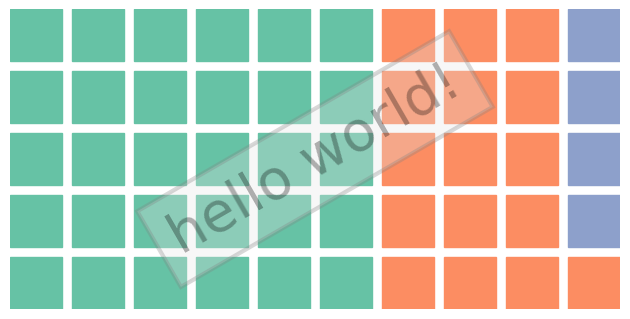

In [59]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[30, 16, 4]
)
fig.text(
    x=0.5,
    y=0.5,
    s="hello world!",
    ha="center",
    va="center",
    rotation=30,
    fontsize=40,
    color='black',
    alpha=0.3,
    bbox={
        'boxstyle': 'square', 
        'lw': 3, 
        'ec': 'gray', 
        'fc': (0.9, 0.9, 0.9, 0.5), 
        'alpha': 0.3
    }
)

### 1.2.3 方格样式变换


Pywaffle支持字符和图标来变换方格样式。

**字符**

Pywaffe允许一个或多个Unicode字符来替换华夫饼图中方格的样式。可用的Unicode字符见：[unicode-table](https://symbl.cc/cn/unicode-table/)。

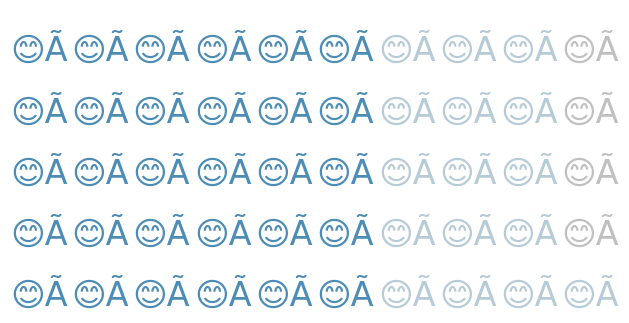

In [60]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[30, 16, 4],
    colors=["#4C8CB5", "#B7CBD7", "#C0C0C0"],
    characters='😊Ã', # 使用两个Unicode字符来展示
    font_size=24
)

**图标**

Pywaffe允许[fontawesome](https://fontawesome.com/)中的图标来替换华夫饼图中方格的样式。**注意，如果是Windows系统，需要matplotlib 3.5.2及以下版本才能支持该功能**。Linux系统对matplotlib版本没有限制。

In [61]:
import matplotlib
# 查看matplotlib版本
matplotlib.__version__

'3.8.3'

图标设置方式如下：

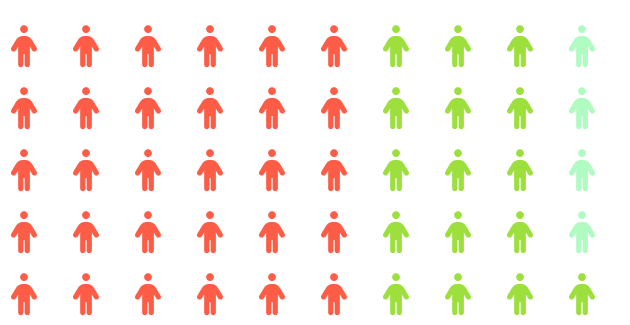

In [62]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[30, 16, 4],
    colors=["#FD5C46", "#9DDF3D", "#AFFBC1"],  # 设置颜色
    icons='person', # 设置icon
    font_size= 30 # 图表大小
)

为每个类别设置对应的图标的方式如下所示：

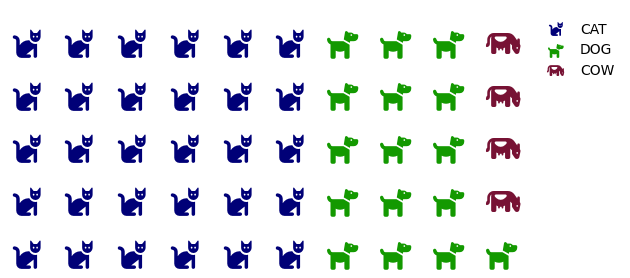

In [63]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values={'Cat': 30, 'Dog': 16, 'Cow': 4},
    colors=["#000077", "#139900", "#771234"],
    icons=['cat', 'dog', 'cow'],
    font_size=20,
    icon_legend=True, # 替换legend的标签为icon
    legend={
        'labels': ['CAT', 'DOG', 'COW'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1),
        'frameon': False,
    }
)

进一步设置图标的样式，注意并非每个FontAwesome都拥有不同的图标样式，因此在编写代码时务必进行检查。

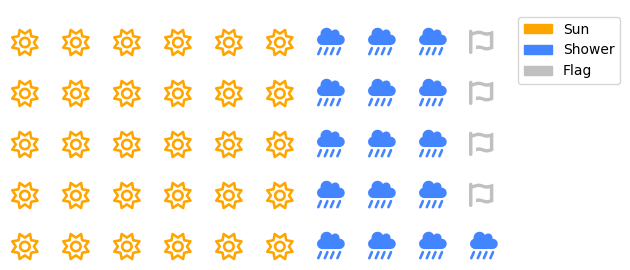

In [64]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[30, 16, 4],
    colors=["#FFA500", "#4384FF", "#C0C0C0"],
    icons=['sun', 'cloud-showers-heavy', 'font-awesome'],
    icon_size=20,
    icon_style=['regular', 'solid', 'brands'],
    icon_legend=False,
    legend={
        'labels': ['Sun', 'Shower', 'Flag'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    }
)

# 2 参考

+ [PyWaffle](https://github.com/gyli/PyWaffle)
+ [PyWaffle-docs](https://pywaffle.readthedocs.io/en/latest/index.html)
+ [unicode-table](https://symbl.cc/cn/unicode-table/)
+ [fontawesome](https://fontawesome.com/)